In [1]:
import numpy as np
import cv2 as cv
from feature_description.sift_descriptor import SIFTDescriptor
from optical_flow.gu import Gu
from optical_flow.bounding_box import BoundingBox
from matplotlib import pyplot as plt

In [2]:
video_path = "/workspaces/python-opencv/repo/videos/IMG_0062.MOV"
# video_path = "/workspaces/python-opencv/repo/videos/0001-0090.mkv"
out_path = "/workspaces/python-opencv/repo/out/gu.mp4"

In [3]:
cap = cv.VideoCapture(video_path)
ret, frame = cap.read()

x, y, w, h = 700, 425, 350, 125
# x, y, w, h = 670, 250, 600, 600
track_window = (x, y, w, h)

In [4]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
video_out = cv.VideoWriter(out_path, fourcc, 30, frame.shape[0:2][::-1])

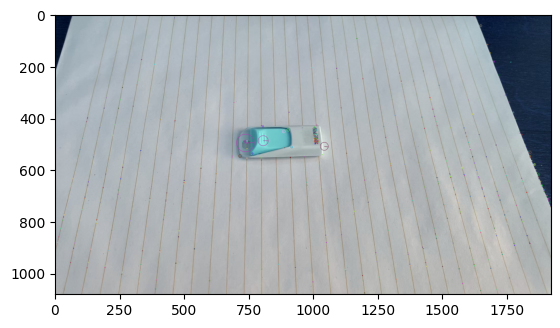

In [5]:
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray,None)


test_frame = cv.drawKeypoints(frame, kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
plt.imshow(test_frame)
plt.show()

In [6]:
bbox = BoundingBox(x, y, w, h)
descriptor = SIFTDescriptor()

In [7]:
img2 = cv.rectangle(test_frame, (x, y),  (x + w, y + h), 255, 2)
video_out.write(img2)

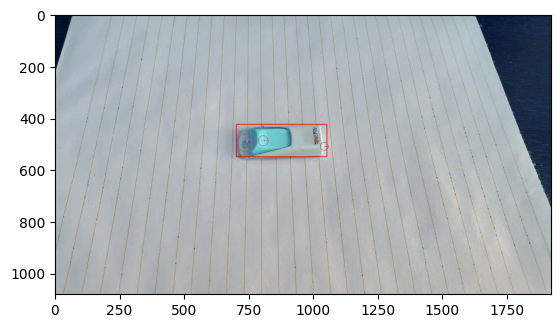

In [8]:
plt.imshow(img2)
plt.show()

In [9]:
gu = Gu(frame, bbox, descriptor)

In [10]:
gu._compute_kappa(bbox, bbox)

np.float64(0.0)

In [11]:
gu.track_frame(frame)

-77.0


BoundingBox(x=699, y=424, w=352, h=126)

In [12]:
for i in range(120):
# while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    my_bbox = gu.track_frame(frame)

    img2 = cv.rectangle(frame, (my_bbox.x, my_bbox.y), (my_bbox.x + my_bbox.w, my_bbox.y + my_bbox.h), 255, 2)

    video_out.write(frame)

-67.97956349206349
-73.9
-74.81851239669422
-76.97956768905341
-74.98479822834646
-75.97266349152193
-74.9593029576339
-86.78985643226092
-72.0
-87.0
-74.98479469476744
-71.93993369602177
-75.89
-73.86
-83.91409413949728
-76.0
-77.99
-88.0
-77.99
-87.0
-74.87
-86.97171572875254
-88.0
-83.99
-74.0
-70.92
-84.97763932022501
-74.98
-79.97
-79.98478940132483
-74.0
-64.97984732824428
-68.98492424242424
-74.84
-75.9375980036984
-72.92196340769024
-78.94242456966512
-72.94968503937008
-80.96479453740157
-75.95074267386457
-84.96496987951807
-66.95916834677419
-92.89712249125888
-74.99
-81.95920899200577
-90.97878935708219
-80.93904052171384
-76.81458601121064
-82.96955327868852
-73.92859121807452
-81.98478560188828
-88.0
-79.9596875
-85.92495663535828
-75.0
-71.0
-78.96
-76.0
-87.87414728682171
-71.44866569630831
-73.43279616724739
-78.98492307692308
-80.86372727272727
-68.90977195984455
-74.98492424242424
-75.98492481203007
-72.91965095412031
-84.90945511595517
-82.0
-82.65802076573654
-82.9

In [13]:
cap.release()
video_out.release()
cv.destroyAllWindows()

In [14]:
# cap = cv.VideoCapture(video_path)
# ret, frame = cap.read()
# bbox = BoundingBox(x, y, w, h)
# descriptor = SIFTDescriptor()
# gu = Gu(frame, bbox, descriptor)
# # img_render = cv.rectangle(frame, (x, y),  (x + w, y + h), 255, 2)
# # video_out.write(img2)
# fourcc = cv.VideoWriter_fourcc(*'mp4v')
# video_out = cv.VideoWriter(out_path, fourcc, 30, frame.shape[0:2][::-1])
# for i in range(60):
#     my_frame = np.roll(frame, shift=i, axis=1)
#     bbox_next = gu.track_frame(my_frame)

#     img2 = cv.rectangle(my_frame, (bbox_next.x, bbox_next.y), (bbox_next.x + bbox_next.w, bbox_next.y + bbox_next.h), 255, 2)

#     print(bbox_next)
#     video_out.write(img2)
# cap.release()
# video_out.release()
# cv.destroyAllWindows()